In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300

# Задание 1

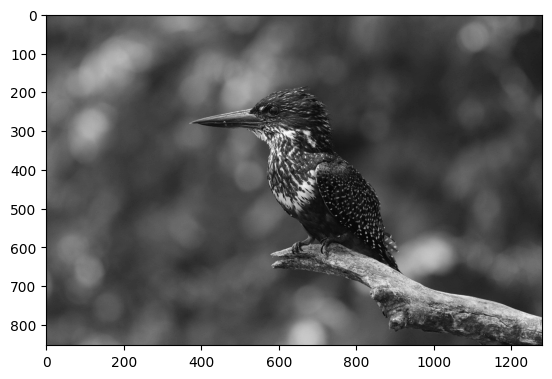

In [2]:
# 1. С помощью библиотеки OpenCV считайте изображение и преобразуйте в градации серого:

img = cv2.imread('/content/giant-kingfisher-5623347_1280.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

In [3]:
# 2. Выполните дискретное преобразование Фурье. Определите компоненту полученного преобразования, находящуюся на пересечении 276 строки и 857 столбца.

f = np.fft.fft2(img)
print(f[276, 857])

(-3793.714615302324-6566.074169014832j)


In [4]:
img.shape

(853, 1280)

В результатемы получаем двумерную матрицу того же размера, что и матрица, отвечающая исходному изображению, элементы которой теперь, вообще говоря, комплексные.

Для удобства визуализации (что общепринято), переместим компоненту, отвечающую нулевой частоте (`f[0][0]`), в центр. Это можно сделать автоматичеки, используя функцию `np.fft.fftshift()`, аргументом которой служит полученное ранее преобразование Фурье `f`. Легко проверить, что так как изображение имеет размеры $853 \times 1280$, то `fshift[426][640] = f[0][0]`.

In [5]:
# 3. Переместите компоненту, отвечающую нулевой частоте f[0][0], в центр и замените все элементы матрицы их модулями — амплитудами.

fshift = np.fft.fftshift(f)
print(fshift[426][640] == f[0][0])

True


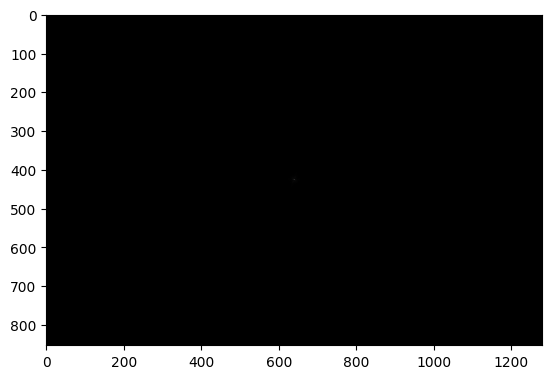

In [6]:
# 4. Примените логарифмическое шкалирование. Определите различие в полученных значениях (разность между наибольшим и наименьшим):
magnitude_spectrum = np.abs(fshift)
plt.imshow(magnitude_spectrum, cmap = 'gray')


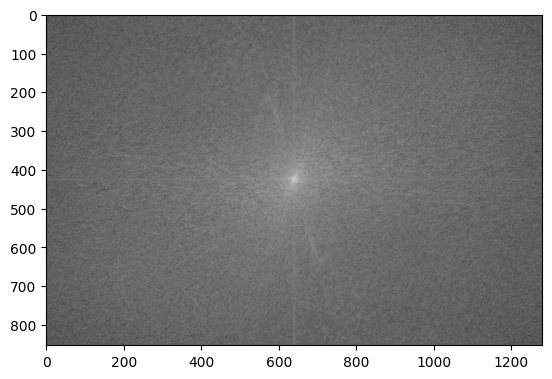

In [7]:
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [8]:
print('Различие:', magnitude_spectrum.max() - magnitude_spectrum.min())

Различие: 16.228873749647605


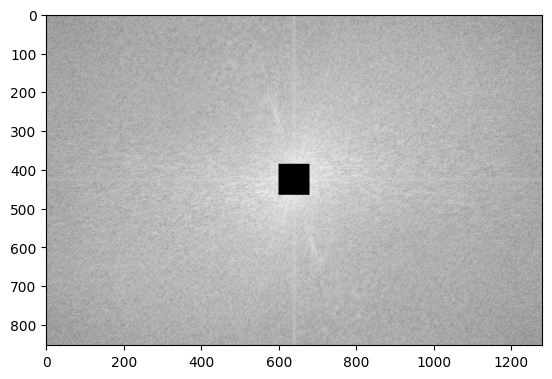

In [9]:
# 5. Занулите амплитуду основных низких частот — матрица размера 80х80 в центре изображения (плюс/минус 40 пикселей от центра). За точку центра следует выбрать результат целочисленного деления на 2 ширины и высота изображения.
# Определите амплитуду обратного преобразования на пересечении 645 строки и 455 столбца матрицы.

fshift[426 -  40 : 426 + 40, 640-40 : 640 + 40] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

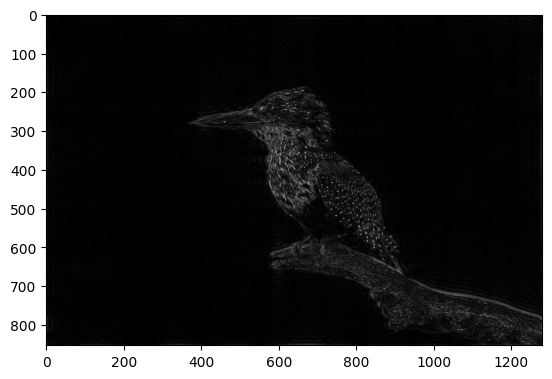

In [10]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

In [11]:
print('Амплитуда обратного преобразования: ', img_back[645][455])

Амплитуда обратного преобразования:  2.2485483596962315


# Задание 2

In [12]:
# 1. С помощью библиотеки OpenCV считайте изображение:

image = cv2.imread('/content/giant-kingfisher-5623347_1280.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

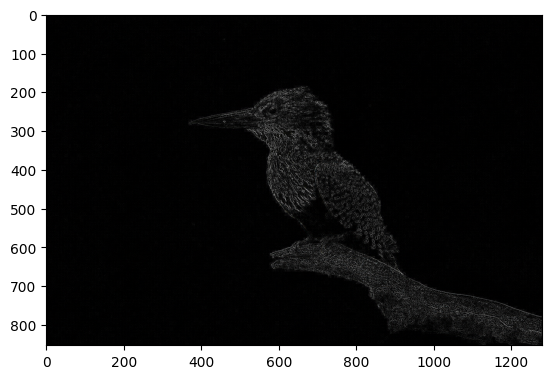

In [13]:
# 2. Постройте градиенты изображений с помощью оператора Лапласа.

laplacian = cv2.Laplacian(image_rgb, -1)
plt.imshow(laplacian)

In [14]:
sum_intensity_laplacian = np.sum(laplacian)
print(f'Сумма интенсивностей всех пикселей по всем трем каналам: {sum_intensity_laplacian}')

Сумма интенсивностей всех пикселей по всем трем каналам: 16755027


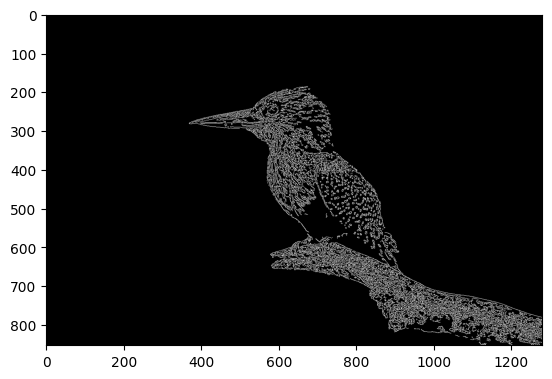

In [15]:
# 3. Примените алгоритм детектора краев Кенни.

canny = cv2.Canny(image_rgb, 100, 200)
plt.imshow(canny, cmap = 'gray')

In [16]:
sum_intensity_canny = np.sum(canny)
print(f'Сумма интенсивностей всех пикселей по всем трем каналам: {sum_intensity_canny}')

Сумма интенсивностей всех пикселей по всем трем каналам: 10256355
